In [117]:
#Required Libraries for image classification 

import os

import shutil

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.layers import Dense,Flatten

from tensorflow.keras.models import Model

from keras.optimizers import Adam

from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.models import Model

from keras.preprocessing import image

from keras.applications.vgg16 import preprocess_input

from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [118]:
#Commonly used Libraries 

import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split

In [119]:
# Set the path to the dataset

dataset_dir = 'C:/Users/Dariy/OneDrive/Desktop/SmartSort/Data/Fruit And Vegetable Diseases Dataset_Process'

classes = os.listdir(dataset_dir)

print(classes)

['Apple__Healthy', 'Apple__Rotten', 'Banana__Healthy', 'Banana__Rotten', 'Bellpepper__Healthy', 'Bellpepper__Rotten', 'Carrot__Healthy', 'Carrot__Rotten', 'Cucumber__Healthy', 'Cucumber__Rotten', 'Grape__Healthy', 'Grape__Rotten', 'Guava__Healthy', 'Guava__Rotten', 'Jujube__Healthy', 'Jujube__Rotten', 'Mango__Healthy', 'Mango__Rotten', 'Orange__Healthy', 'Orange__Rotten', 'Pomegranate__Healthy', 'Pomegranate__Rotten', 'Potato__Healthy', 'Potato__Rotten', 'Strawberry__Healthy', 'Strawberry__Rotten', 'Tomato__Healthy', 'Tomato__Rotten']


### Collect The Dataset

In [120]:
# Creating a Dataset That is Suitable for Training and Visualization 

# Create directories for train, val, and test sets

output_dir = 'output_dataset'
os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)

for cls in classes:
    os.makedirs(os.path.join(output_dir, 'train', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test', cls), exist_ok=True)
    
    class_dir = os.path.join(dataset_dir, cls)
    images = os.listdir(class_dir)[:200]
    
    print(cls, len(images))
    
    train_and_val_images, test_images = train_test_split(images, test_size=0.2,random_state=42)
    train_images, val_images = train_test_split(train_and_val_images, test_size = 0.25, random_state=42)# 0.25 x 0.8 - 0.2
    
    # Copy images to respective directories
    for img in train_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'train', cls, img))
    for img in val_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'val', cls, img))
    for img in test_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'test', cls, img))
        
print("Dataset split into training, validation, and test sets.")

Apple__Healthy 200
Apple__Rotten 200
Banana__Healthy 200
Banana__Rotten 200
Bellpepper__Healthy 200
Bellpepper__Rotten 200
Carrot__Healthy 200
Carrot__Rotten 200
Cucumber__Healthy 200
Cucumber__Rotten 200
Grape__Healthy 200
Grape__Rotten 200
Guava__Healthy 200
Guava__Rotten 200
Jujube__Healthy 200
Jujube__Rotten 200
Mango__Healthy 200
Mango__Rotten 200
Orange__Healthy 200
Orange__Rotten 200
Pomegranate__Healthy 200
Pomegranate__Rotten 200
Potato__Healthy 200
Potato__Rotten 200
Strawberry__Healthy 200
Strawberry__Rotten 200
Tomato__Healthy 200
Tomato__Rotten 200
Dataset split into training, validation, and test sets.


### Preprocessing and Split Dataset

In [121]:
#Define directories

dataset_dir='C:/Users/Dariy/OneDrive/Desktop/SmartSort/notebooks/output_dataset'
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

In [122]:
#Define image size expected by the pre-trained model

IMG_SIZE = (224, 224) # Common size for many models like ResNet, VGG, MobileNet

In [123]:
#Preprocessing

#Create ImageDataGenerators for resizing and augmenting the images

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 8.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_test_datagen = ImageDataGenerator(rescale = 1./255)

In [124]:
#Load and resize the images from directories

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = IMG_SIZE,
    batch_size=32,
    class_mode ='categorical' 
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size = IMG_SIZE,
    batch_size = 32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size = IMG_SIZE,
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False # Do not shuffle test data
)

Found 3355 images belonging to 28 classes.
Found 1120 images belonging to 28 classes.
Found 1120 images belonging to 28 classes.


In [125]:
type(train_generator)

keras.src.legacy.preprocessing.image.DirectoryIterator

In [126]:
#Print class indices for reference

# print(train_generator.class_indices)
# print(val_generator.class_indices)
print(test_generator.class_indices)

{'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9, 'Grape__Healthy': 10, 'Grape__Rotten': 11, 'Guava__Healthy': 12, 'Guava__Rotten': 13, 'Jujube__Healthy': 14, 'Jujube__Rotten': 15, 'Mango__Healthy': 16, 'Mango__Rotten': 17, 'Orange__Healthy': 18, 'Orange__Rotten': 19, 'Pomegranate__Healthy': 20, 'Pomegranate__Rotten': 21, 'Potato__Healthy': 22, 'Potato__Rotten': 23, 'Strawberry__Healthy': 24, 'Strawberry__Rotten': 25, 'Tomato__Healthy': 26, 'Tomato__Rotten': 27}


### Data Visualization

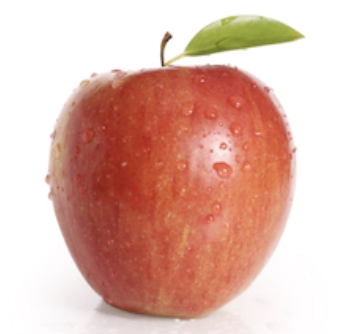

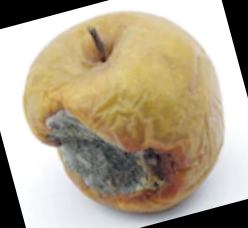

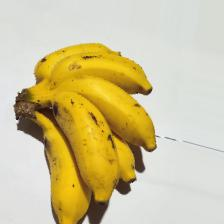

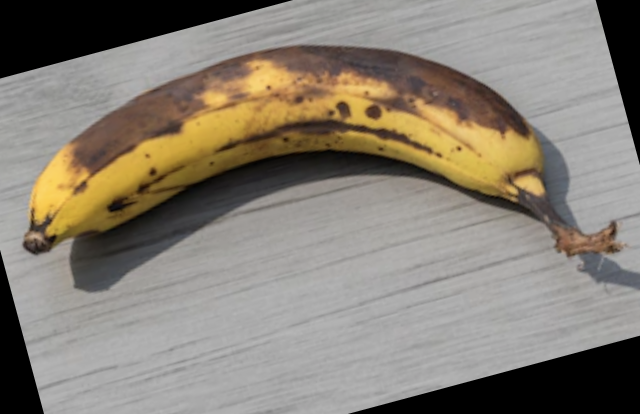

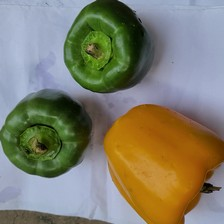

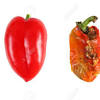

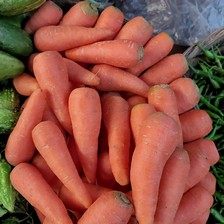

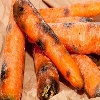

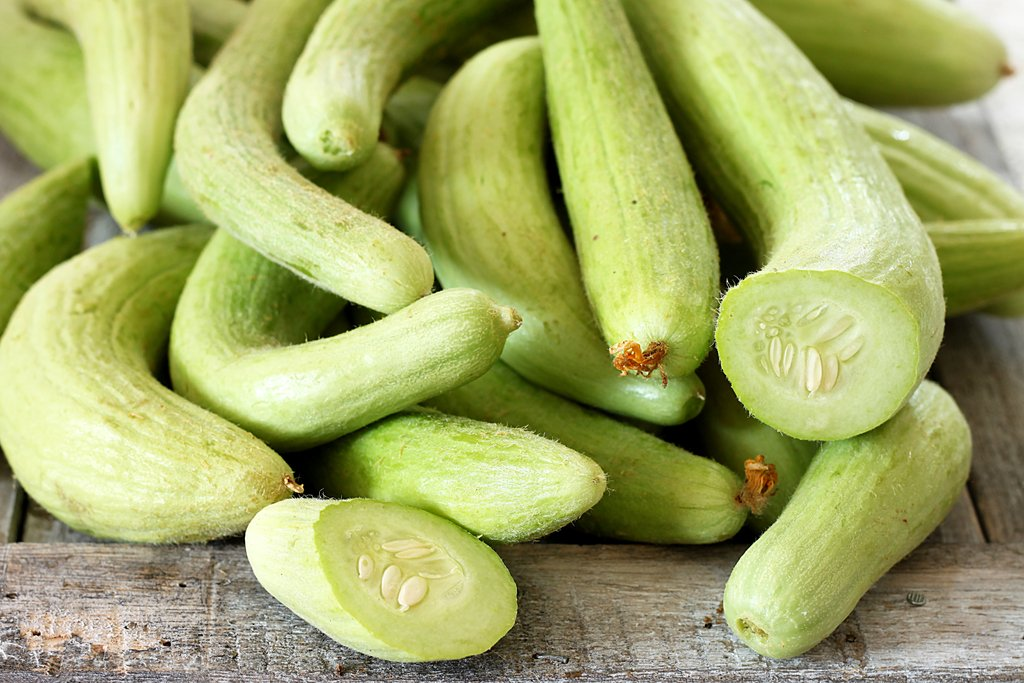

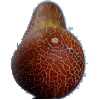

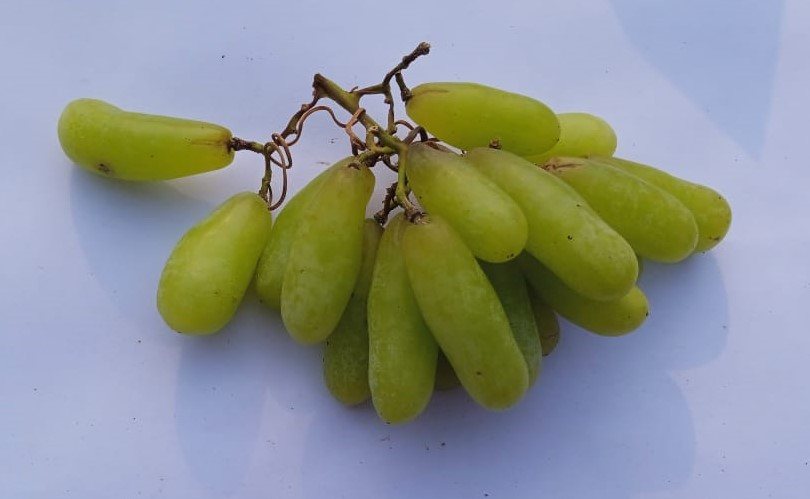

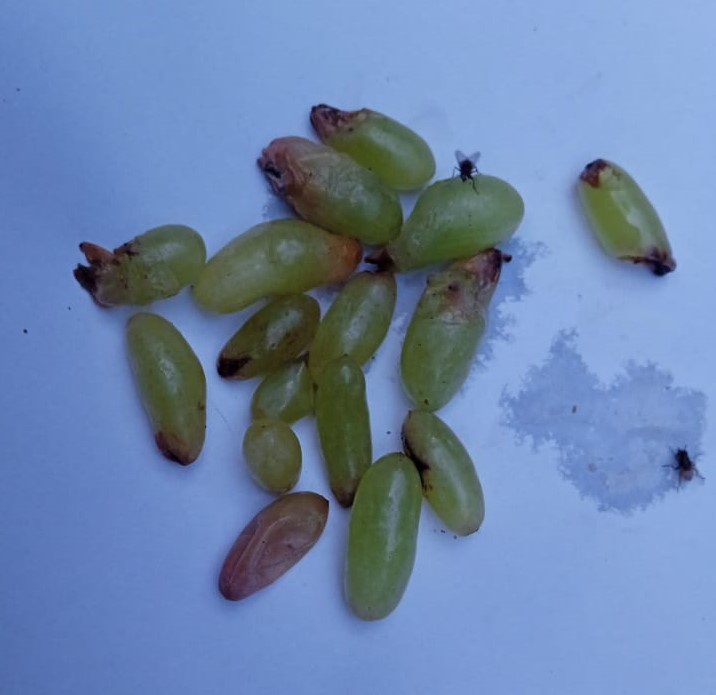

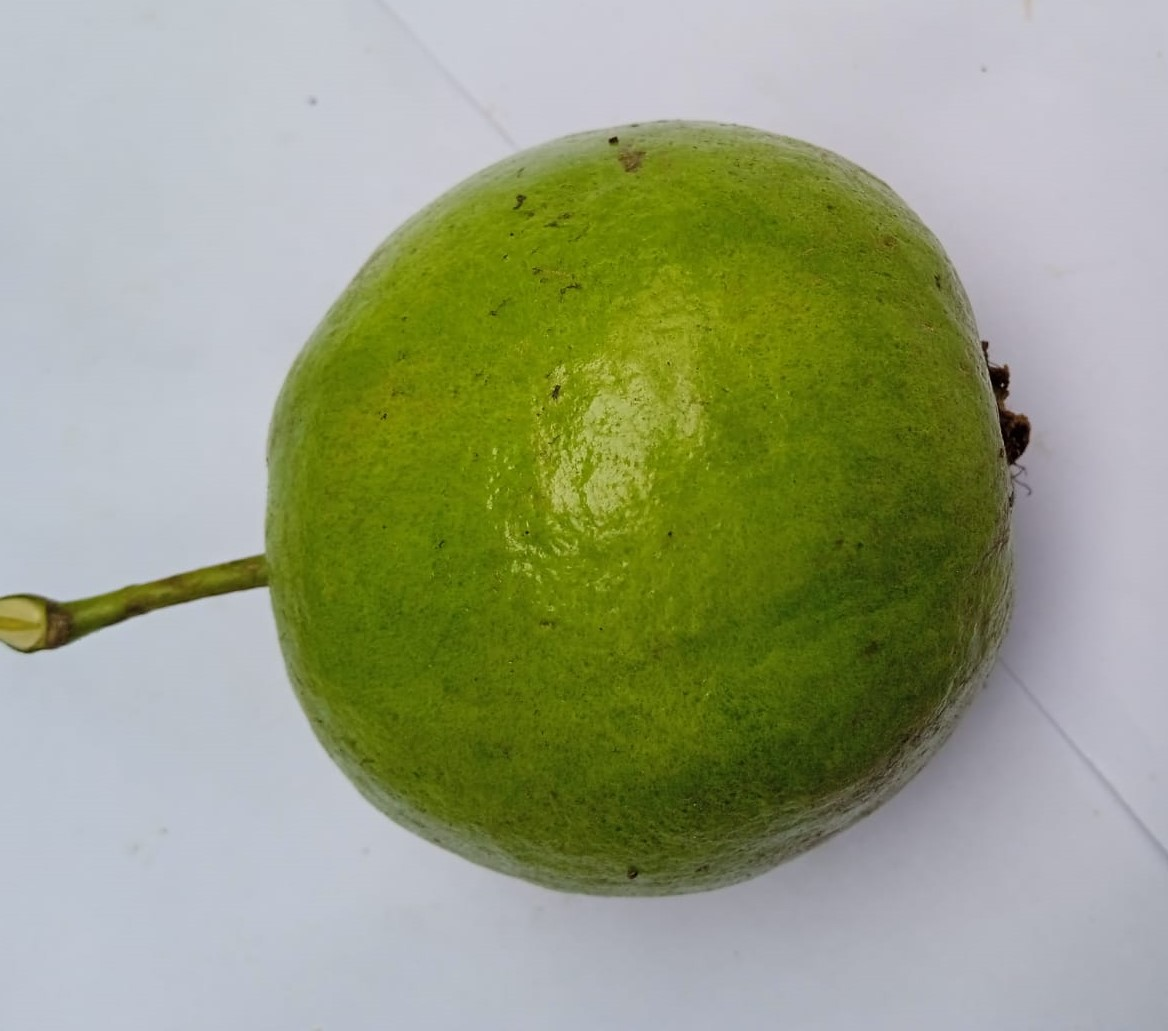

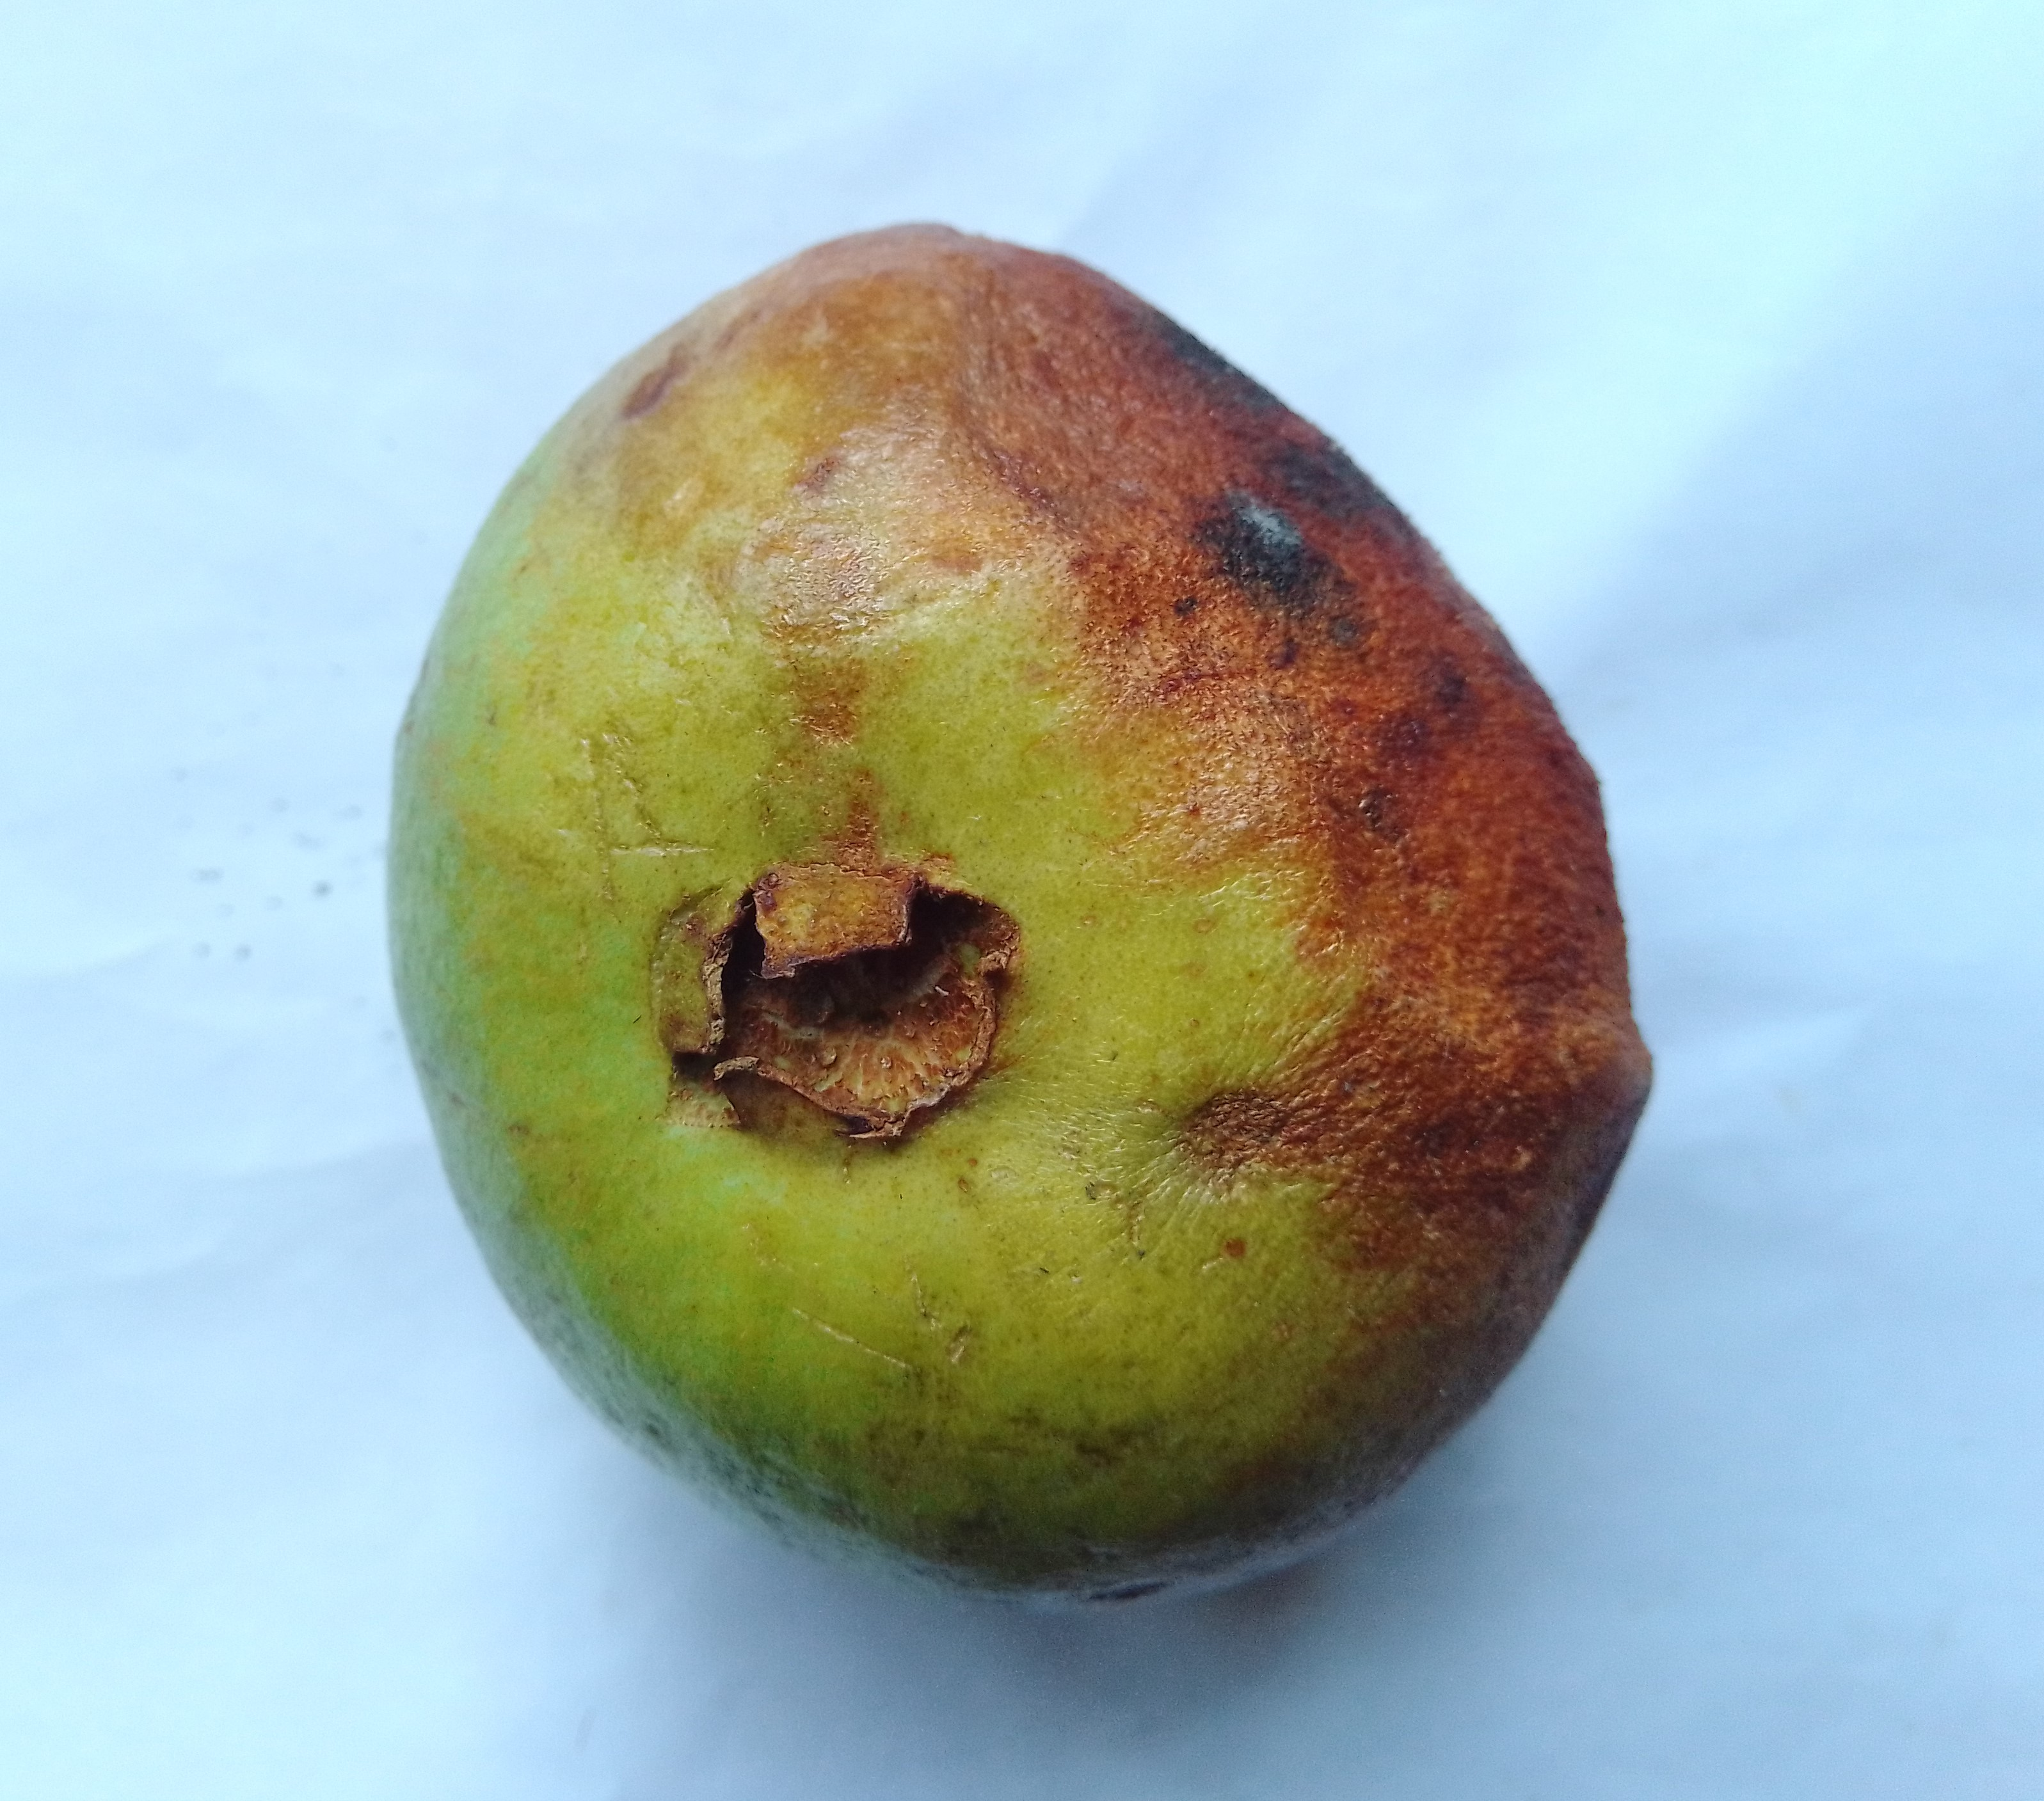

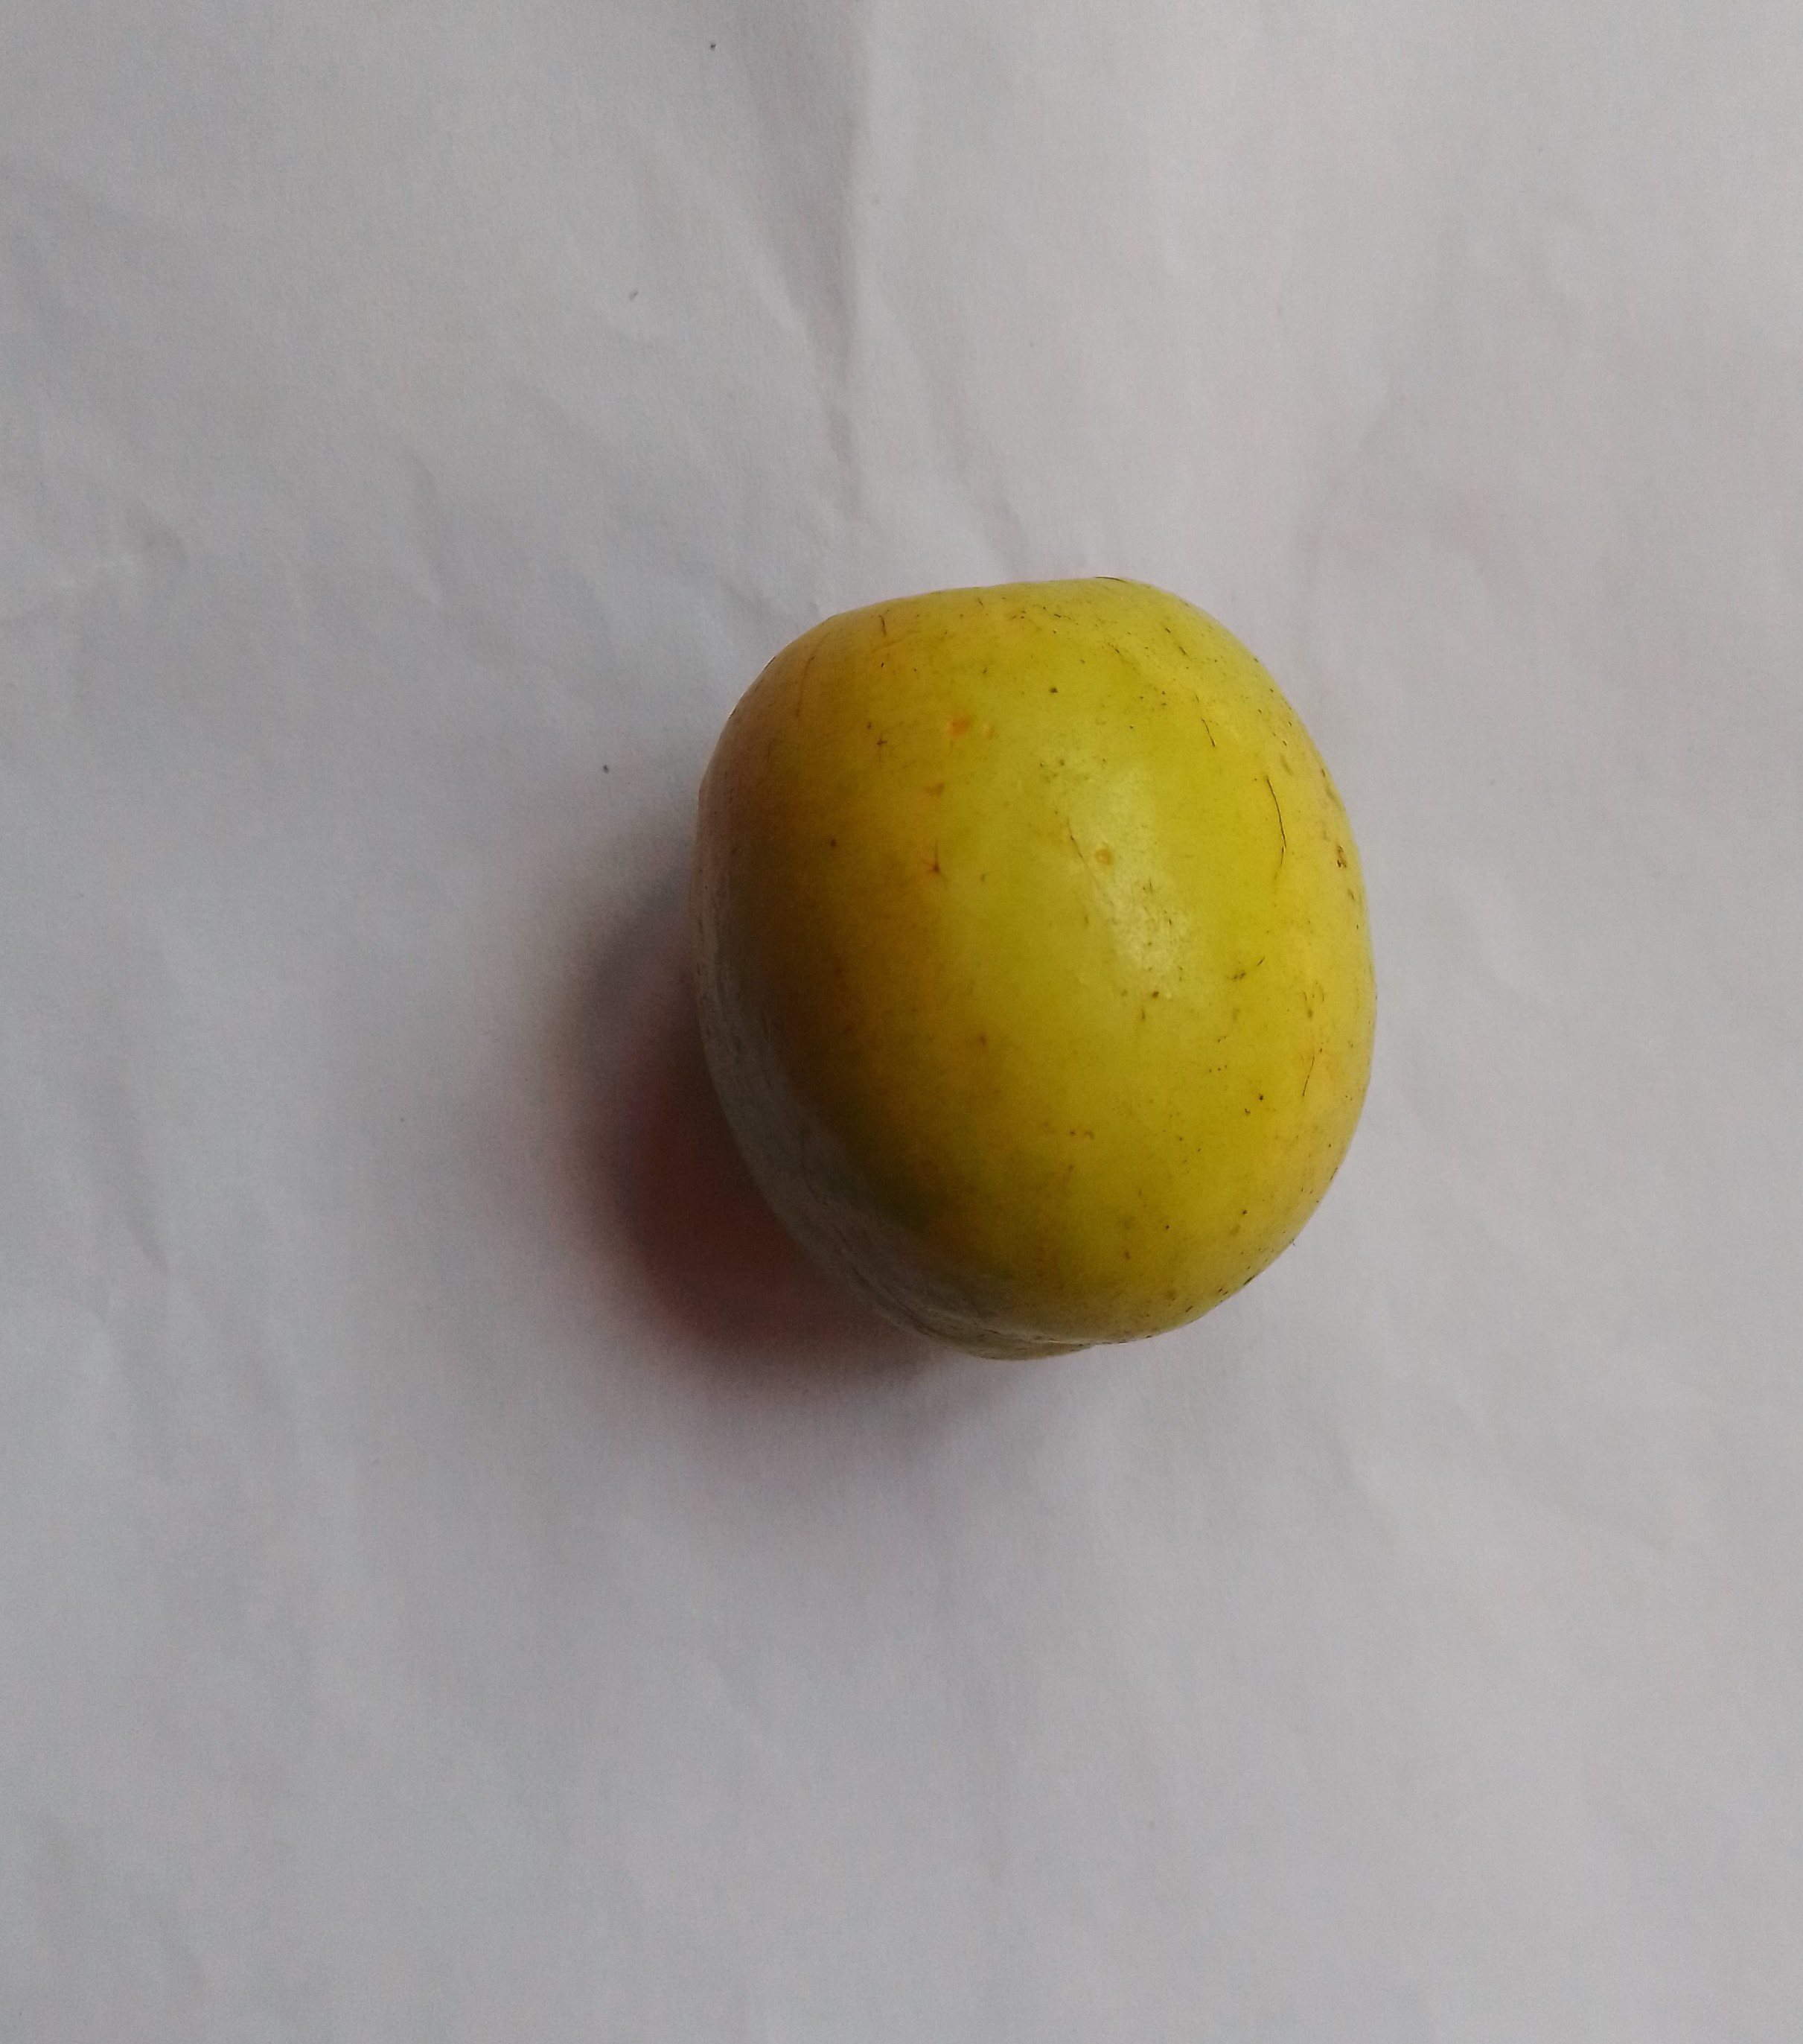

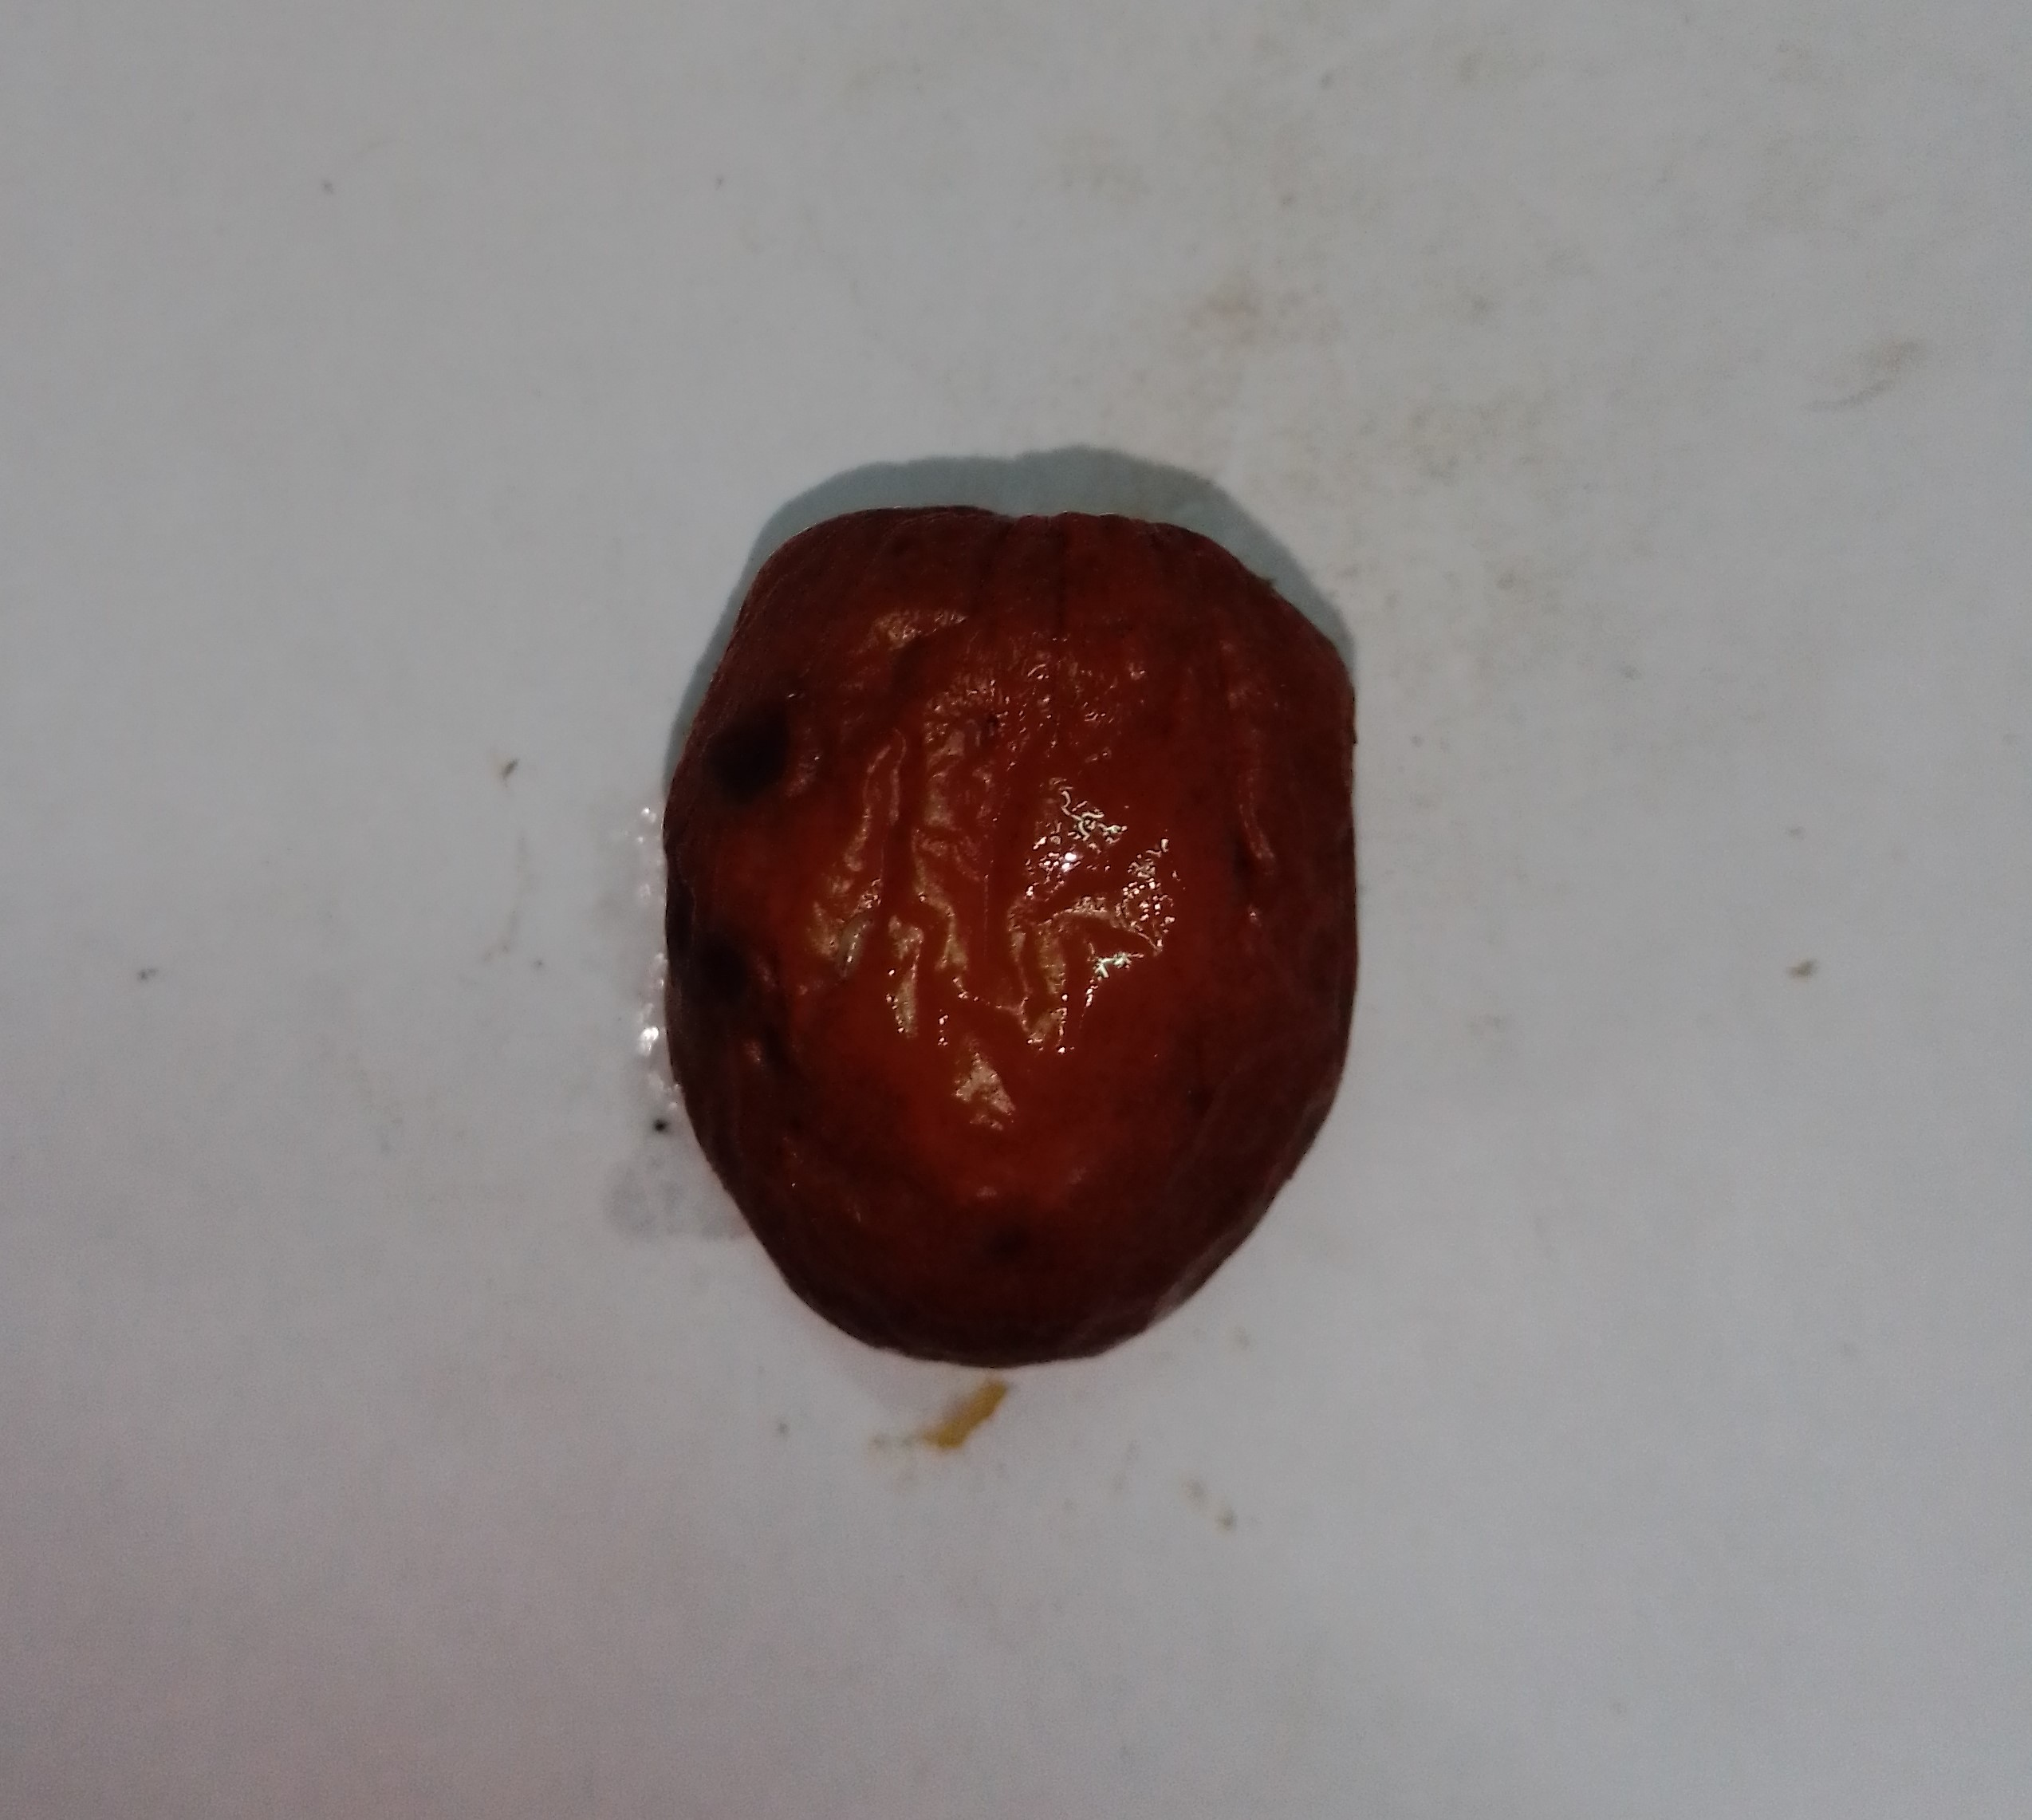

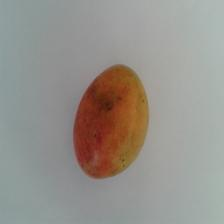

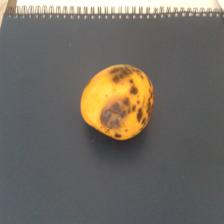

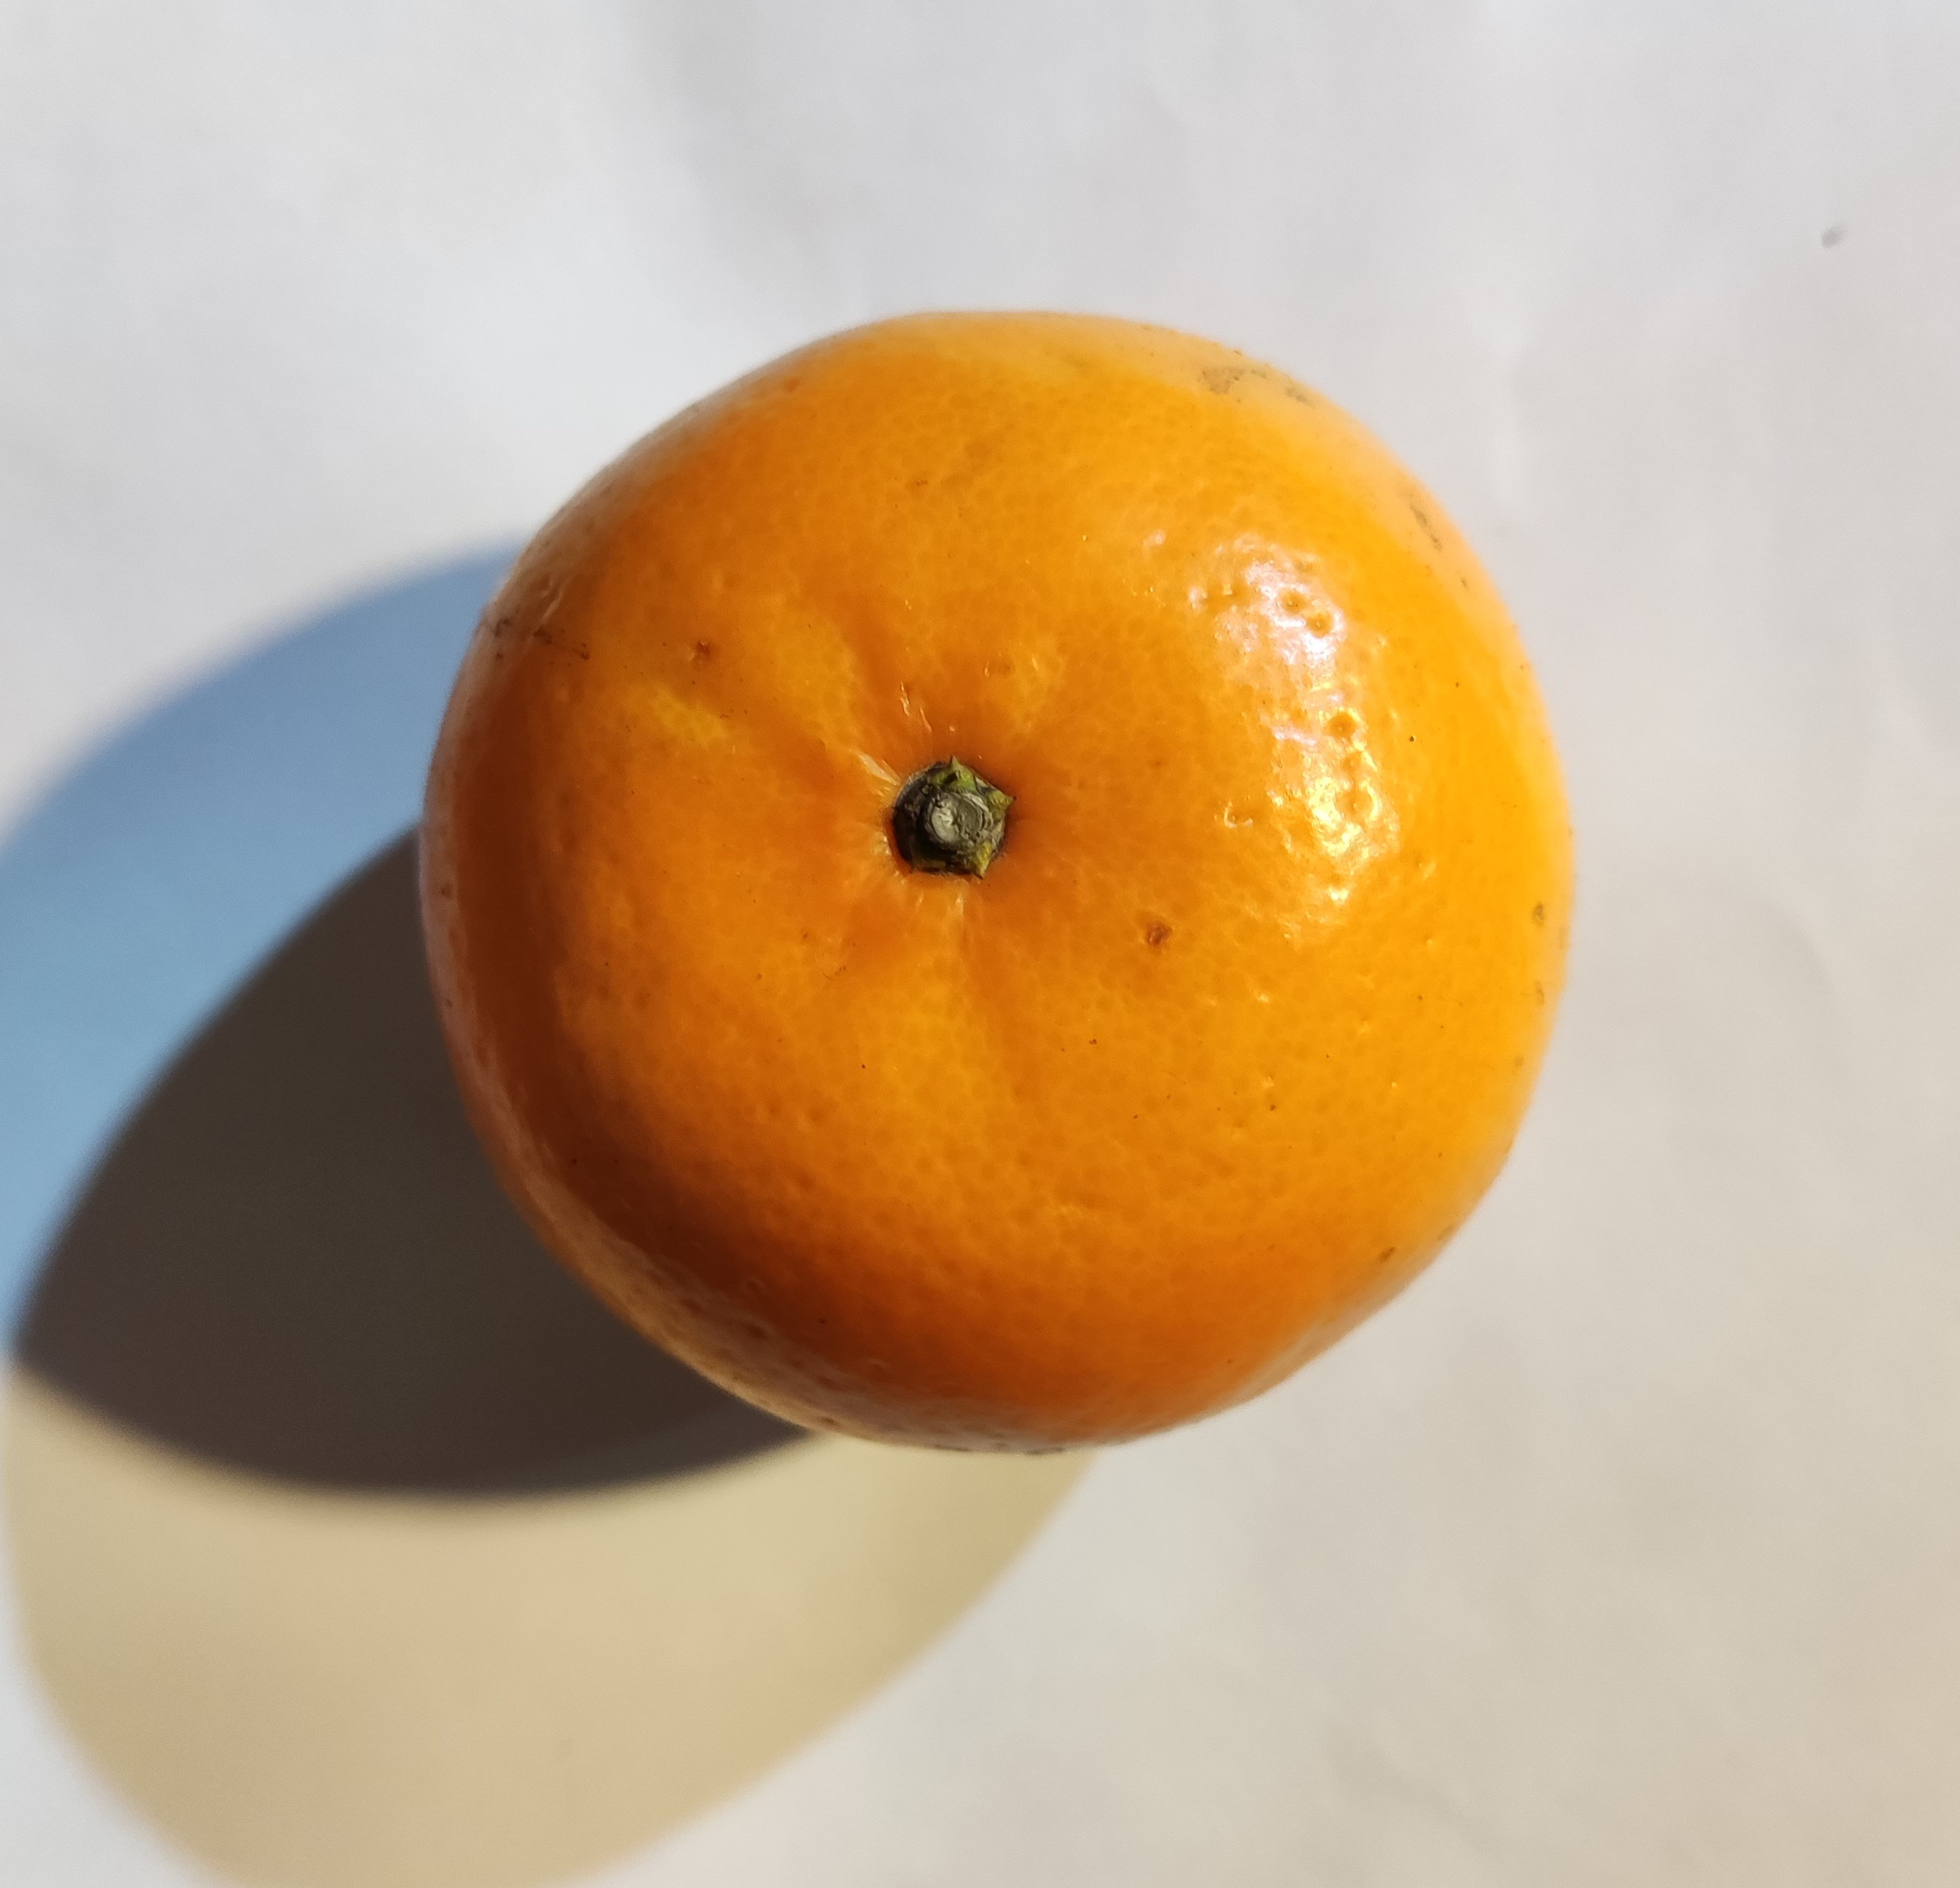

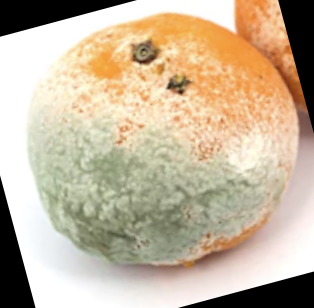

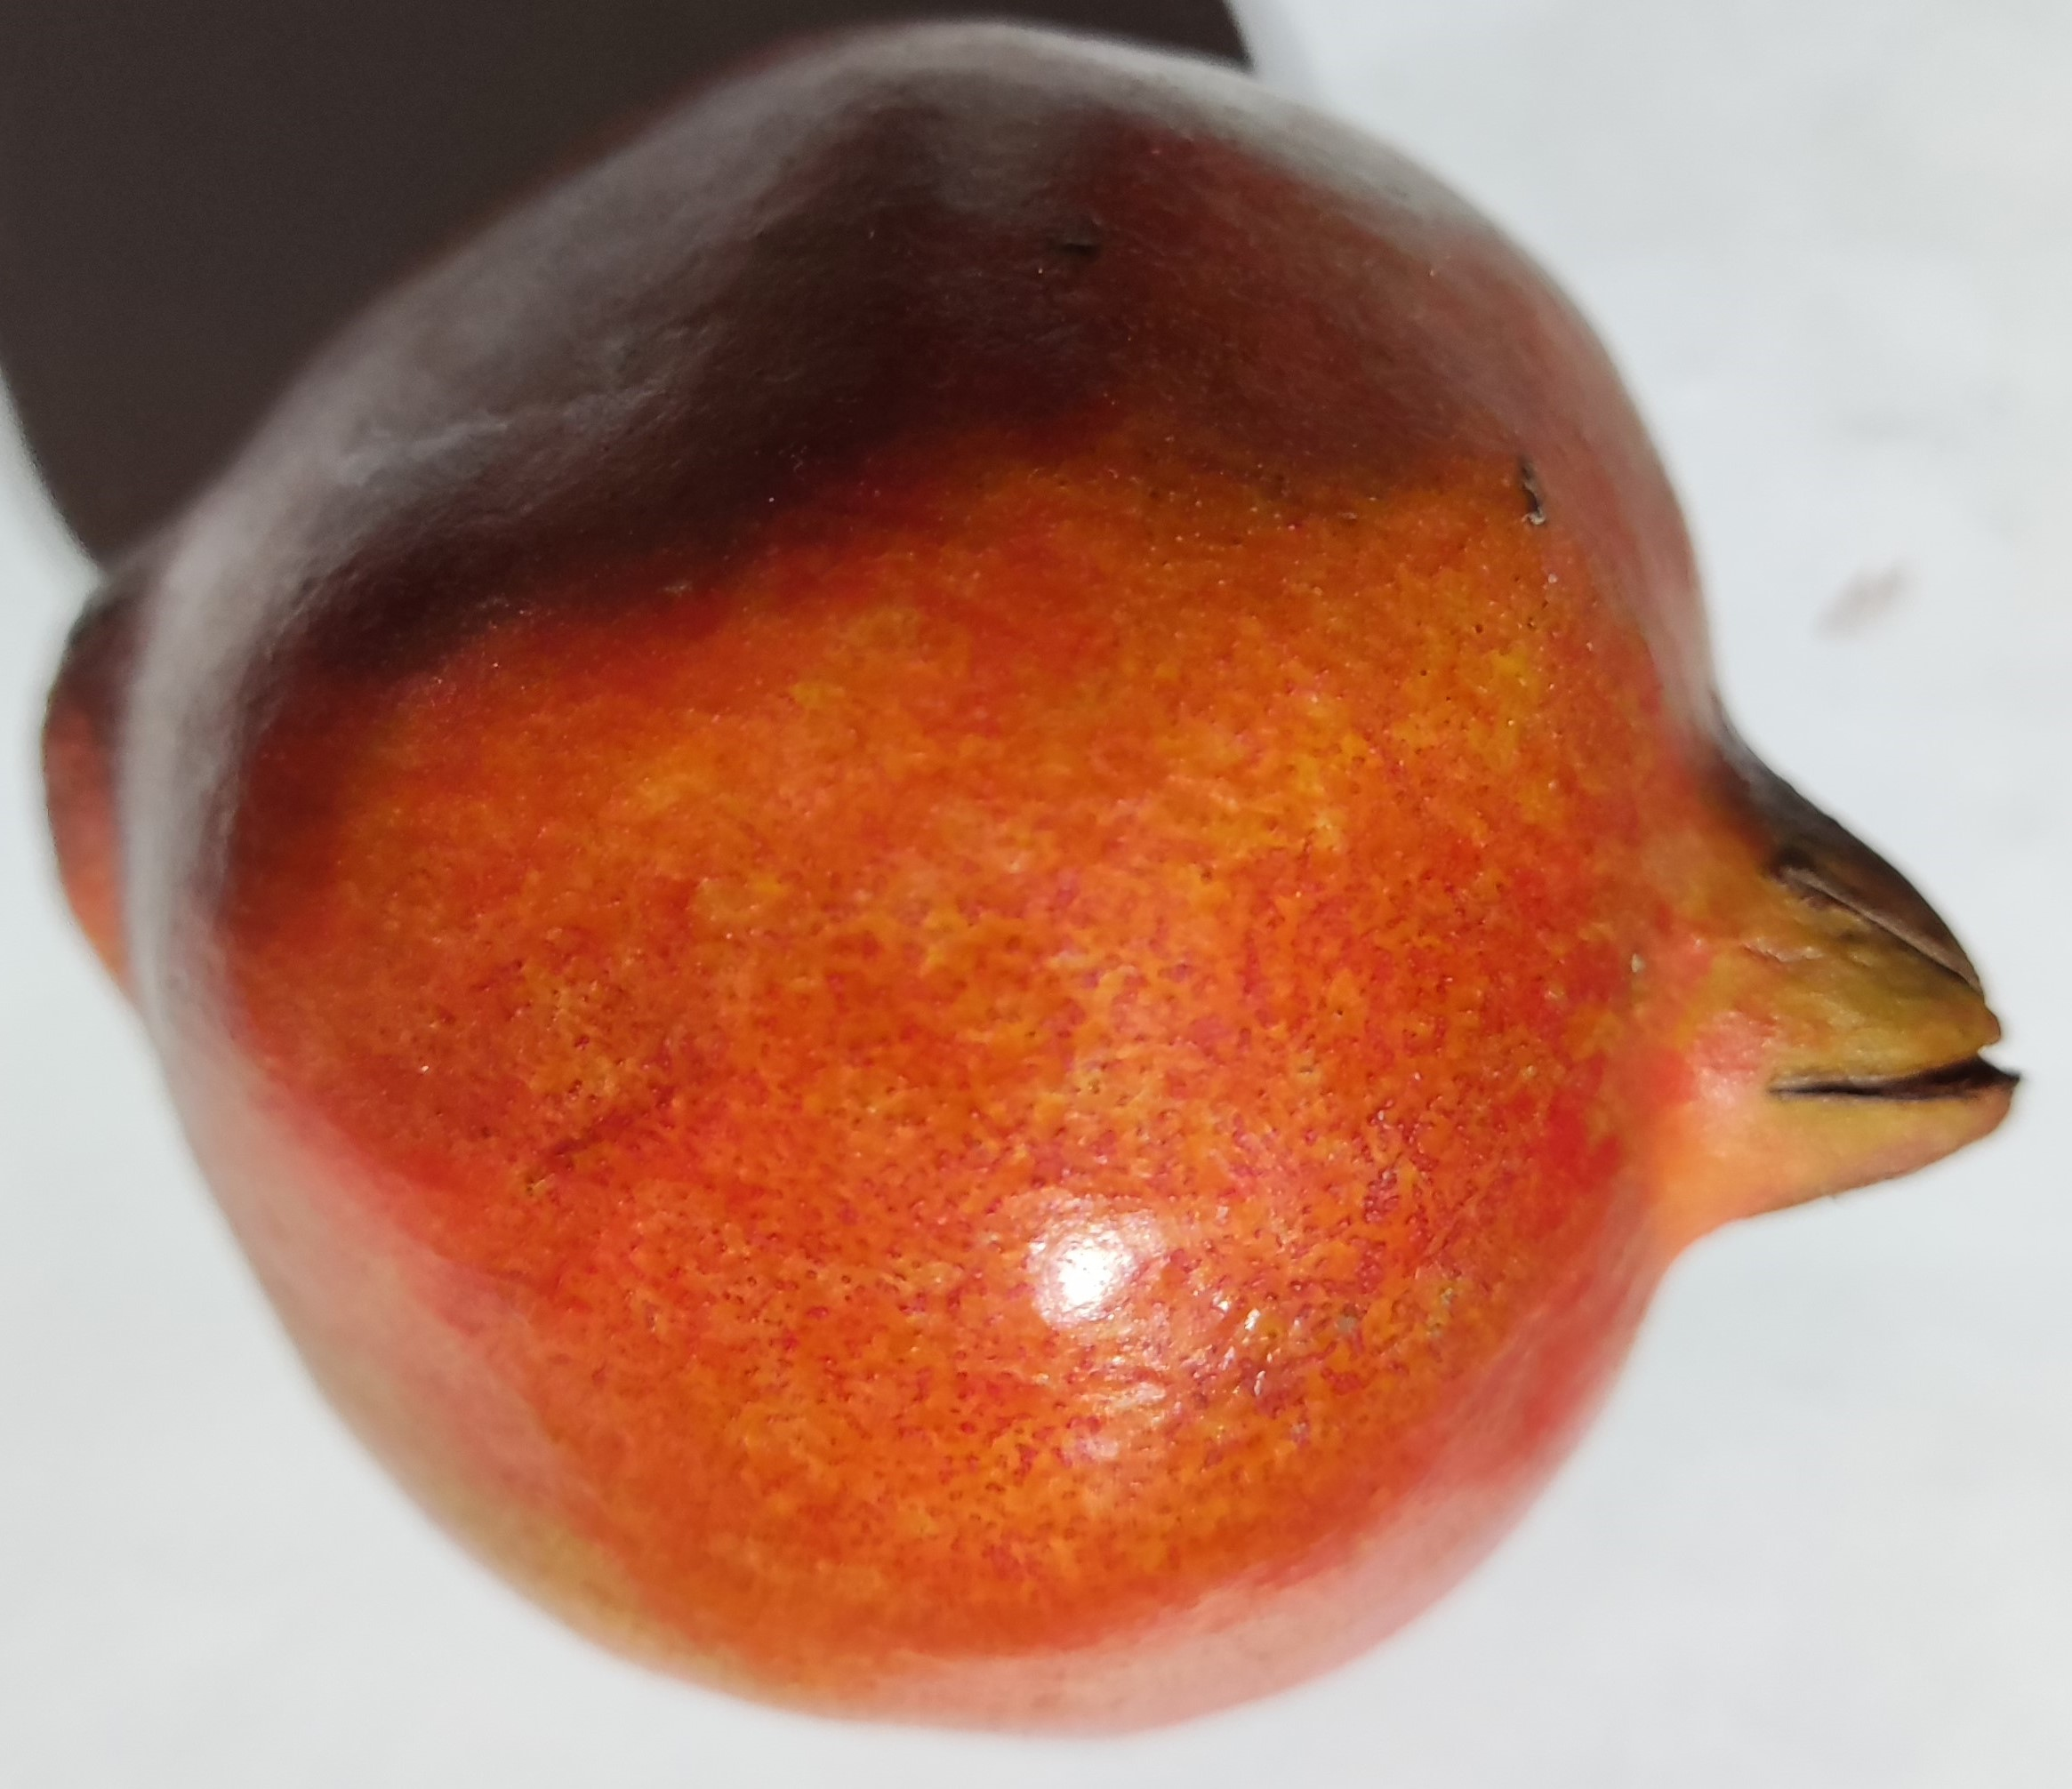

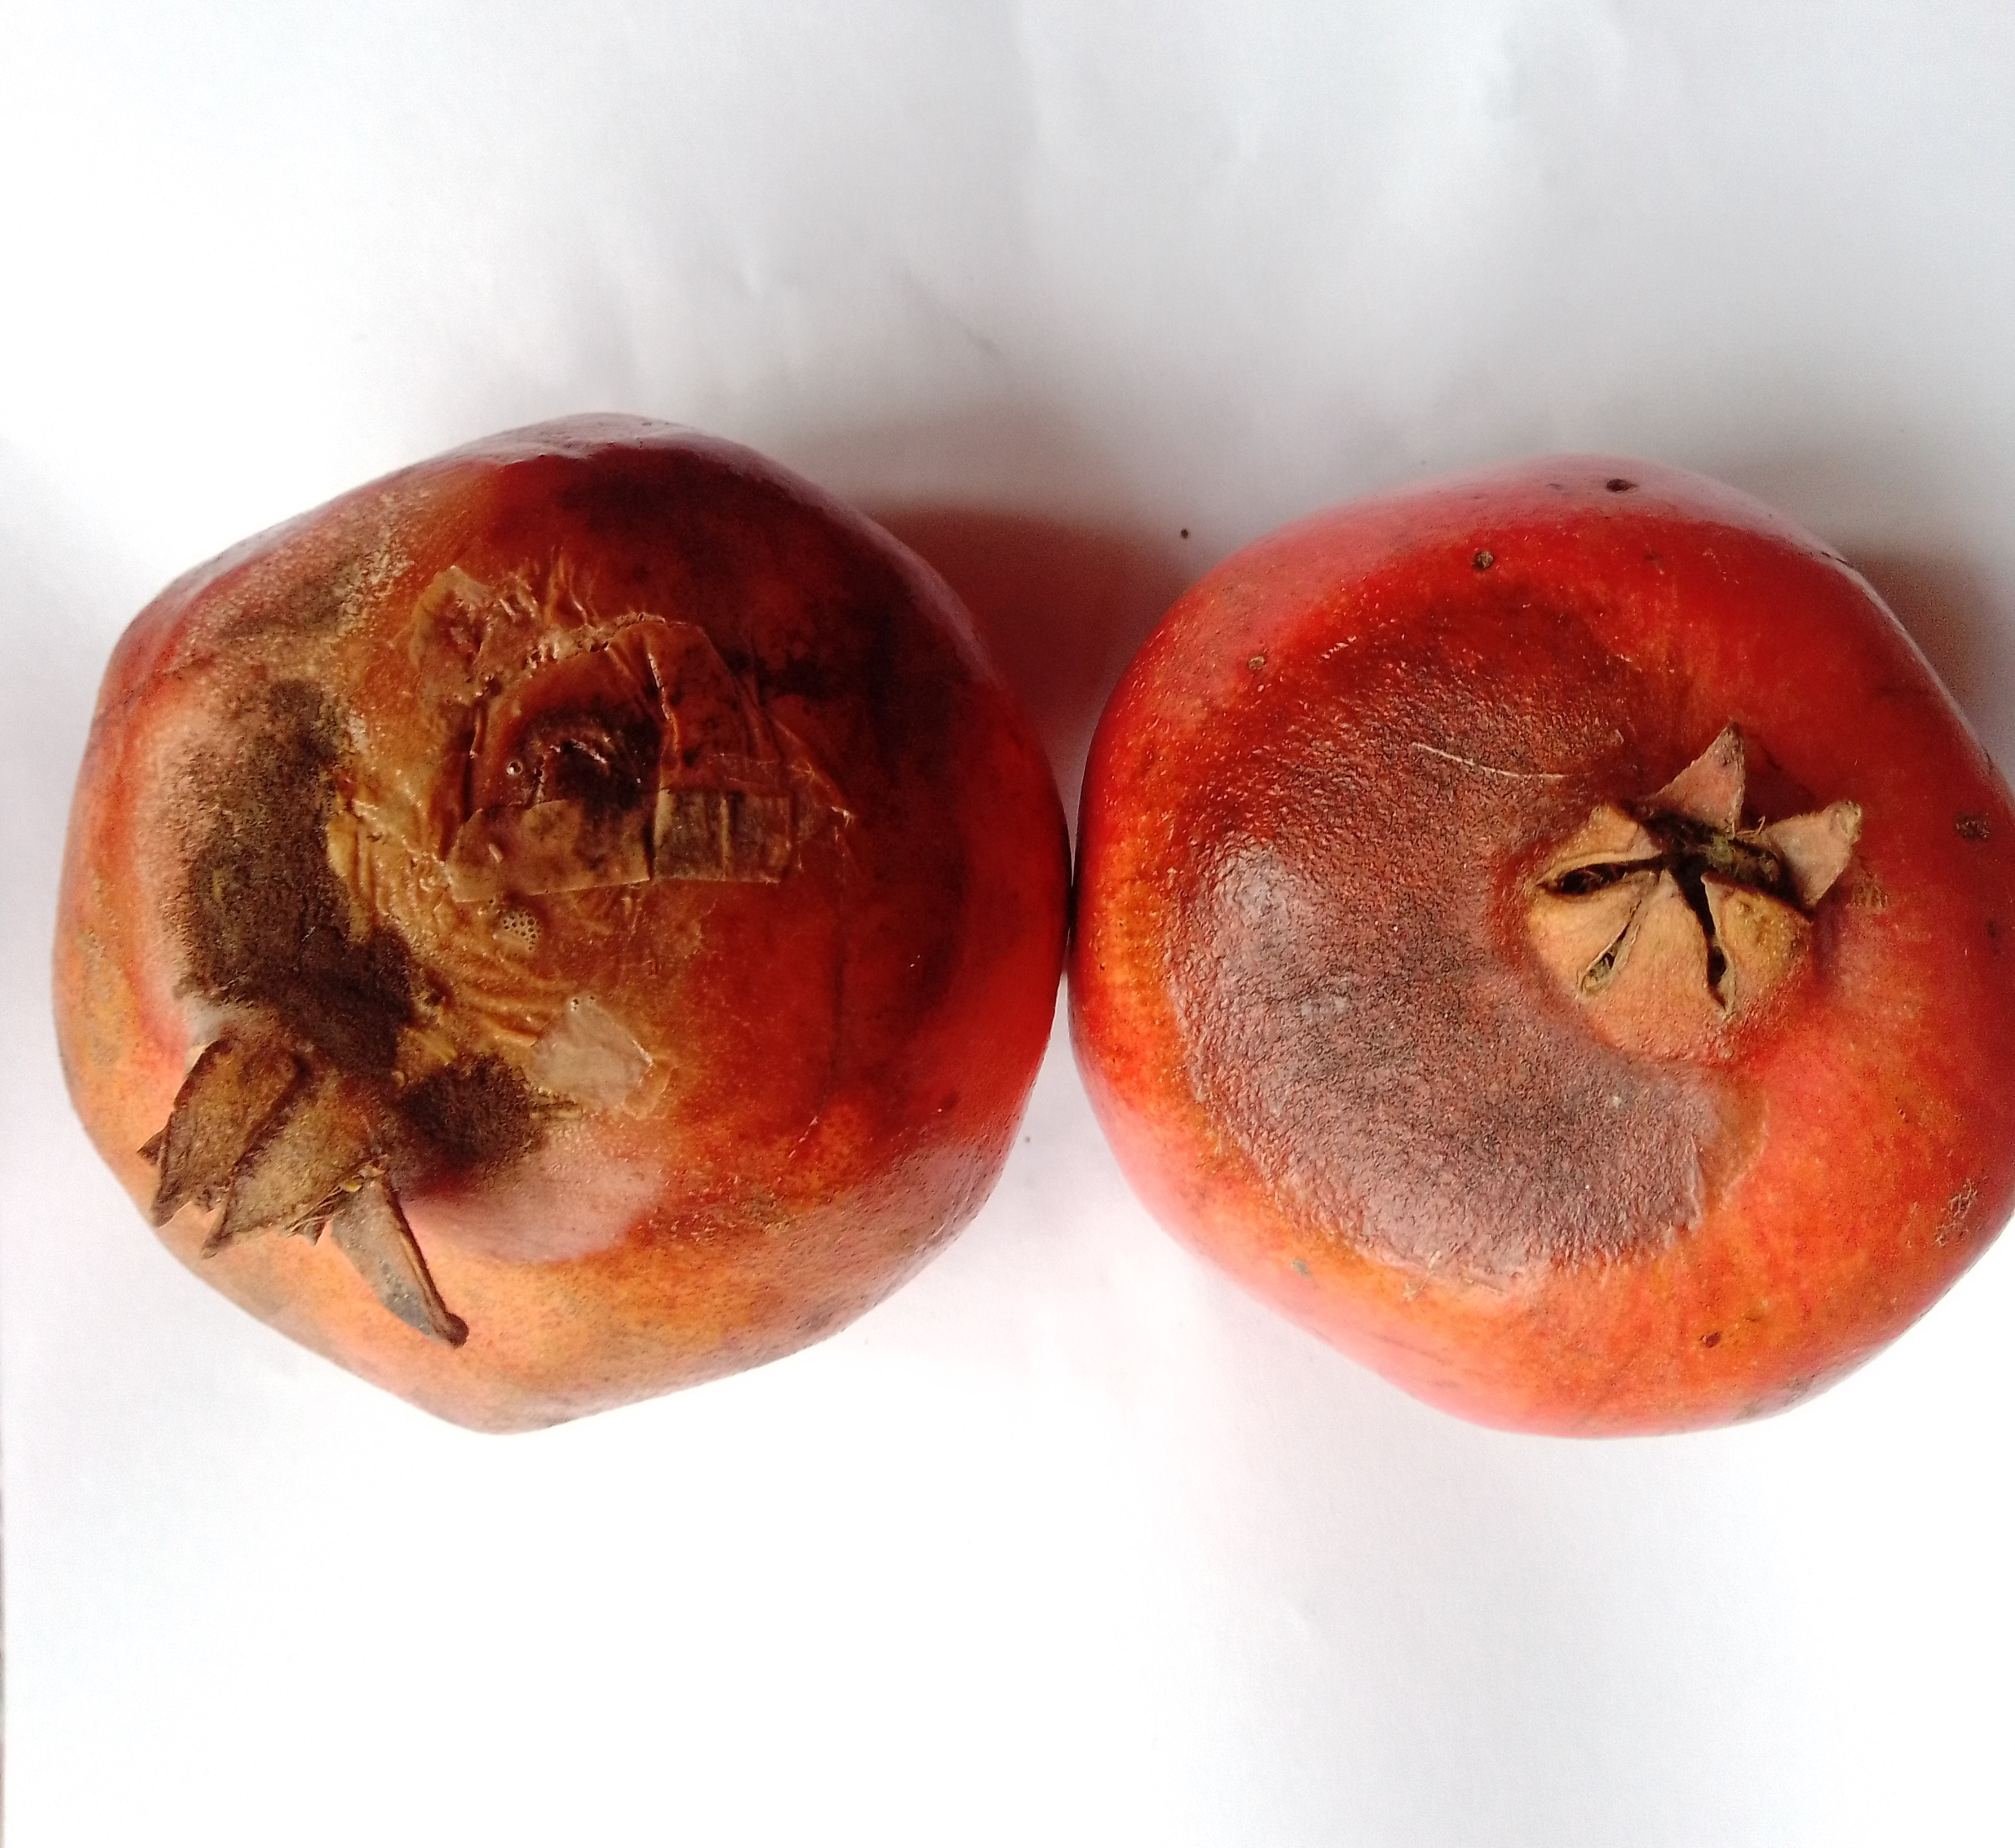

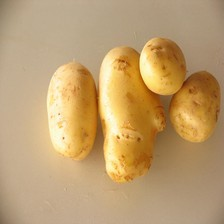

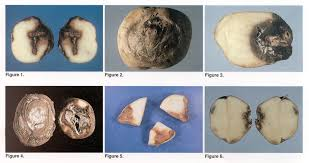

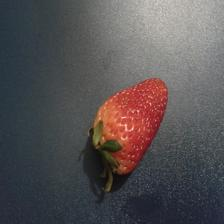

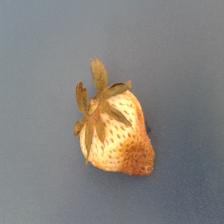

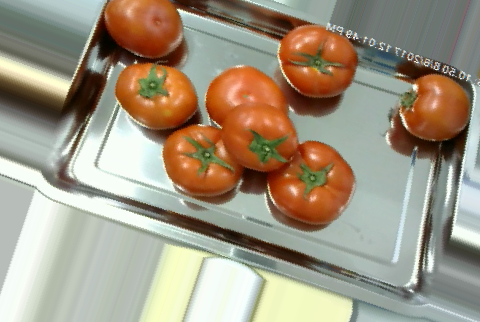

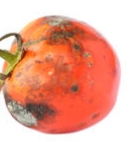

In [127]:
# Exploring Random Images From The Dataset. 

import random
from IPython.display import Image,display

for cls in classes:
    #Specify the actual Path to your image folder
    folder_path = os.path.join(train_dir, cls)

    #List all files in the folder 
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg','.png','.jpeg'))]

    #Select a random image from the list 
    selected_image = random.choice(image_files)

    # Display the randomly selected image
    image_path = os.path.join(folder_path , selected_image)
    display(Image(filename = image_path))

### Model Building (VGG16 Transfer Learning Model)

In [128]:
'''The VGG16-based neural network is created using a pre-trained VGG16 architecture with frozen weights. The model is built sequentially, incorporating the VGG16 base, a flattening layer, dropout for regularization, and a dense layer with SoftMax activation for :::classification into five categories:::. The model is compiled using the Adam optimizer and sparse categorical cross-entropy loss. During training, which spans 10 epochs, a generator is employed for the training data, and validation is conducted, incorporating call-backs such as Model Checkpoint and Early Stopping. The best-performing model is saved as "healthy_vs_rotten.h5 " for potential future use. The model summary provides an overview of the architecture, showcasing the layers and parameters involved.'''

'The VGG16-based neural network is created using a pre-trained VGG16 architecture with frozen weights. The model is built sequentially, incorporating the VGG16 base, a flattening layer, dropout for regularization, and a dense layer with SoftMax activation for :::classification into five categories:::. The model is compiled using the Adam optimizer and sparse categorical cross-entropy loss. During training, which spans 10 epochs, a generator is employed for the training data, and validation is conducted, incorporating call-backs such as Model Checkpoint and Early Stopping. The best-performing model is saved as "healthy_vs_rotten.h5 " for potential future use. The model summary provides an overview of the architecture, showcasing the layers and parameters involved.'

In [129]:
#Including VGG16 model

vgg = VGG16(include_top = False , input_shape =(224,224,3))

In [130]:
for layer in vgg.layers:
    print(layer)

<InputLayer name=input_layer_2, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


In [131]:
len(vgg.layers)

19

In [132]:
#Freezing all layers in the VGG model

for layer in vgg.layers:
    layer.trainable = False

In [133]:
# Flattening the Last Layer Output Of the VGG model.
# And adding two more Dense Layers

x = Flatten()(vgg.output)
x= Dense(256, activation='relu')(x)
output = Dense(28 , activation = 'softmax')(x)

In [134]:
# Model Building with 28 classes

vgg16 = Model(inputs = vgg.input, outputs = output)

In [135]:
vgg16.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Layer (type)             ┃ Output Shape      ┃   Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ input_layer_2            │ (None, 224, 224,  │         0 │
│ (InputLayer)             │ 3)                │           │
├──────────────────────────┼───────────────────┼───────────┤
│ block1_conv1 (Conv2D)    │ (None, 224, 224,  │     1,792 │
│                          │ 64)               │           │
├──────────────────────────┼───────────────────┼───────────┤
│ block1_conv2 (Conv2D)    │ (None, 224, 224,  │    36,928 │
│                          │ 64)               │           │
├──────────────────────────┼───────────────────┼───────────┤
│ block1_pool              │ (None, 112, 112,  │         0 │
│ (MaxPooling2D)           │ 64)               │           │
├──────────────────────────┼───────────────────┼───────────┤
│ block2_conv1 (Conv2D)    │ (None, 112, 112,  │    73,856 │
│                          │ 128)              │           │
├──────────────────────────┼───────────────────┼───────────┤
│ block2_conv2 (Conv2D)    │ (None, 112, 112,  │   147,584 │
│                          │ 128)              │           │
├──────────────────────────┼───────────────────┼───────────┤
│ block2_pool              │ (None, 56, 56,    │         0 │
│ (MaxPooling2D)           │ 128)              │           │
├──────────────────────────┼───────────────────┼───────────┤
│ block3_conv1 (Conv2D)    │ (None, 56, 56,    │   295,168 │
│                          │ 256)              │           │
├──────────────────────────┼───────────────────┼───────────┤
│ block3_conv2 (Conv2D)    │ (None, 56, 56,    │   590,080 │
│                          │ 256)              │           │
├──────────────────────────┼───────────────────┼───────────┤
│ block3_conv3 (Conv2D)    │ (None, 56, 56,    │   590,080 │
│                          │ 256)              │           │
├──────────────────────────┼───────────────────┼───────────┤
│ block3_pool              │ (None, 28, 28,    │         0 │
│ (MaxPooling2D)           │ 256)              │           │
├──────────────────────────┼───────────────────┼───────────┤
│ block4_conv1 (Conv2D)    │ (None, 28, 28,    │ 1,180,160 │
│                          │ 512)              │           │
├──────────────────────────┼───────────────────┼───────────┤
│ block4_conv2 (Conv2D)    │ (None, 28, 28,    │ 2,359,808 │
│                          │ 512)              │           │
├──────────────────────────┼───────────────────┼───────────┤
│ block4_conv3 (Conv2D)    │ (None, 28, 28,    │ 2,359,808 │
│                          │ 512)              │           │
├──────────────────────────┼───────────────────┼───────────┤
│ block4_pool              │ (None, 14, 14,    │         0 │
│ (MaxPooling2D)           │ 512)              │           │
├──────────────────────────┼───────────────────┼───────────┤
│ block5_conv1 (Conv2D)    │ (None, 14, 14,    │ 2,359,808 │
│                          │ 512)              │           │
├──────────────────────────┼───────────────────┼───────────┤
│ block5_conv2 (Conv2D)    │ (None, 14, 14,    │ 2,359,808 │
│                          │ 512)              │           │
├──────────────────────────┼───────────────────┼───────────┤
│ block5_conv3 (Conv2D)    │ (None, 14, 14,    │ 2,359,808 │
│                          │ 512)              │           │
├──────────────────────────┼───────────────────┼───────────┤
│ block5_pool              │ (None, 7, 7, 512) │         0 │
│ (MaxPooling2D)           │                   │           │
├──────────────────────────┼───────────────────┼───────────┤
│ flatten_3 (Flatten)      │ (None, 25088)     │         0 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_6 (Dense)          │ (None, 256)       │ 6,422,784 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_7 (Dense)          │ (None, 28)        │     7,196 │
└──────────────────────────┴───────

 Total params: 21,144,668 (80.66 MB)

 Trainable params: 6,429,980 (24.53 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [139]:
# Importing Methods for Regularization & Optimization.

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam 

# Setting learning rate for Adam Optimizer.

opt = Adam(learning_rate= 0.0001)
checkpoint = ModelCheckpoint('C:/Users/Dariy/OneDrive/Desktop/SmartSort/Healthy_Vs_Rotten3{epoch:02d}.h5',
                            monitor = 'val_accuracy',
                            save_best_only= False,
                            save_weights_only = False,
                            mode ='max',
                            save_freq='epoch')

In [140]:
# Defineing Early Stopping CallBack

early_stopping = EarlyStopping(monitor='val_accuracy',patience=3, restore_best_weights=True)

In [141]:
# Compileing the Model 

vgg16.compile(optimizer ="Adam" , loss='categorical_crossentropy',metrics=['accuracy'])


## Trained Model1

In [23]:
# Training The Model With Early Stopping CallBack

history = vgg16.fit(train_generator,
                    validation_data=test_generator,
                    epochs = 15,
                    steps_per_epoch = 20,
                    callbacks = [early_stopping]
                   )

C:\Users\Dariy\.conda\envs\SmartB\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
 2/20 ━━━━━━━━━━━━━━━━━━━━ 1:38 5s/step - accuracy: 0.0312 - loss: 4.6287

C:\Users\Dariy\.conda\envs\SmartB\lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 284s 15s/step - accuracy: 0.0849 - loss: 4.8520 - val_accuracy: 0.2679 - val_loss: 2.5295
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 280s 14s/step - accuracy: 0.2957 - loss: 2.5255 - val_accuracy: 0.5045 - val_loss: 1.7584
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 276s 14s/step - accuracy: 0.4713 - loss: 1.8729 - val_accuracy: 0.5500 - val_loss: 1.4383
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 280s 14s/step - accuracy: 0.5958 - loss: 1.5111 - val_accuracy: 0.7054 - val_loss: 1.0652
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 279s 14s/step - accuracy: 0.6176 - loss: 1.2513 - val_accuracy: 0.7304 - val_loss: 0.9705
Epoch 6/15
 5/20 ━━━━━━━━━━━━━━━━━━━━ 1:14 5s/step - accuracy: 0.6046 - loss: 1.3582

C:\Users\Dariy\.conda\envs\SmartB\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


20/20 ━━━━━━━━━━━━━━━━━━━━ 207s 11s/step - accuracy: 0.6058 - loss: 1.2771 - val_accuracy: 0.6670 - val_loss: 1.1219
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 282s 15s/step - accuracy: 0.6504 - loss: 1.0965 - val_accuracy: 0.6705 - val_loss: 1.0763
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 284s 15s/step - accuracy: 0.6247 - loss: 1.1533 - val_accuracy: 0.7464 - val_loss: 0.8464
Epoch 9/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 282s 15s/step - accuracy: 0.6891 - loss: 1.0185 - val_accuracy: 0.7589 - val_loss: 0.8053
Epoch 10/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 278s 14s/step - accuracy: 0.7718 - loss: 0.8762 - val_accuracy: 0.7732 - val_loss: 0.8192
Epoch 11/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 278s 14s/step - accuracy: 0.7620 - loss: 0.8729 - val_accuracy: 0.7857 - val_loss: 0.7166
Epoch 12/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 200s 10s/step - accuracy: 0.7889 - loss: 0.7691 - val_accuracy: 0.8205 - val_loss: 0.6145
Epoch 13/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 277s 14s/step - accuracy: 0.7680 - loss: 0.7636 - val_accuracy: 0.8036 - 

In [26]:
# Saving The Model

vgg16.save('C:/Users/Dariy/OneDrive/Desktop/SmartSort/models/healthy_or_rotten1.keras')

In [27]:
vgg16.save('C:/Users/Dariy/OneDrive/Desktop/SmartSort/models/Healthy_or_Rotten1.h5')

In [159]:
# Loading the Saved Model

from keras.models import load_model

model =  load_model('C:/Users/Dariy/OneDrive/Desktop/SmartSort/HEALTHY_VS_ROTTEN2.keras')


### Increasing Number of epoch (Model 2)

In [110]:
# Training The Model With Early Stopping CallBack

history = vgg16.fit(train_generator,
                    validation_data=test_generator,
                    epochs = 25,
                    steps_per_epoch = 30,
                    callbacks = [early_stopping]
                   )

Epoch 1/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 252s 9s/step - accuracy: 0.1183 - loss: 4.3619 - val_accuracy: 0.4205 - val_loss: 1.9883
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 296s 10s/step - accuracy: 0.4324 - loss: 1.9885 - val_accuracy: 0.6232 - val_loss: 1.2410
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 313s 11s/step - accuracy: 0.5423 - loss: 1.5468 - val_accuracy: 0.7161 - val_loss: 1.0172
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 239s 8s/step - accuracy: 0.7000 - loss: 0.9974 - val_accuracy: 0.7295 - val_loss: 0.8905
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 310s 11s/step - accuracy: 0.6801 - loss: 1.0487 - val_accuracy: 0.7696 - val_loss: 0.7727
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 314s 11s/step - accuracy: 0.7481 - loss: 0.8434 - val_accuracy: 0.7759 - val_loss: 0.7518
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 308s 10s/step - accuracy: 0.7231 - loss: 0.9350 - val_accuracy: 0.7812 - val_loss: 0.6635
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 251s 8s/step - accuracy: 0.7759 - loss: 0.7417 - val_accuracy: 0.812

### Training for 3rd Time

In [142]:
# Training The Model With Early Stopping CallBack

history = vgg16.fit(train_generator,
                    validation_data=val_generator,
                    epochs = 22,
                    steps_per_epoch = 30,
                    callbacks = [checkpoint , early_stopping]
                   )

Epoch 1/22
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.0769 - loss: 5.4277  

30/30 ━━━━━━━━━━━━━━━━━━━━ 292s 10s/step - accuracy: 0.0781 - loss: 5.3890 - val_accuracy: 0.2688 - val_loss: 2.5698
Epoch 2/22
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3077 - loss: 2.5173  

30/30 ━━━━━━━━━━━━━━━━━━━━ 335s 11s/step - accuracy: 0.3089 - loss: 2.5112 - val_accuracy: 0.4902 - val_loss: 1.7928
Epoch 3/22
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4534 - loss: 1.8914  

30/30 ━━━━━━━━━━━━━━━━━━━━ 313s 11s/step - accuracy: 0.4548 - loss: 1.8869 - val_accuracy: 0.5634 - val_loss: 1.4383
Epoch 4/22
15/30 ━━━━━━━━━━━━━━━━━━━━ 1:12 5s/step - accuracy: 0.5323 - loss: 1.6021

30/30 ━━━━━━━━━━━━━━━━━━━━ 238s 8s/step - accuracy: 0.5419 - loss: 1.5989 - val_accuracy: 0.6321 - val_loss: 1.2701
Epoch 5/22
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6069 - loss: 1.3780  

30/30 ━━━━━━━━━━━━━━━━━━━━ 317s 11s/step - accuracy: 0.6076 - loss: 1.3764 - val_accuracy: 0.6741 - val_loss: 1.1010
Epoch 6/22
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6822 - loss: 1.1691  

30/30 ━━━━━━━━━━━━━━━━━━━━ 314s 11s/step - accuracy: 0.6820 - loss: 1.1694 - val_accuracy: 0.6866 - val_loss: 1.0224
Epoch 7/22
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6738 - loss: 1.1057  

30/30 ━━━━━━━━━━━━━━━━━━━━ 320s 11s/step - accuracy: 0.6745 - loss: 1.1030 - val_accuracy: 0.7536 - val_loss: 0.8623
Epoch 8/22
15/30 ━━━━━━━━━━━━━━━━━━━━ 1:14 5s/step - accuracy: 0.7317 - loss: 0.9468

30/30 ━━━━━━━━━━━━━━━━━━━━ 246s 8s/step - accuracy: 0.7440 - loss: 0.9146 - val_accuracy: 0.7491 - val_loss: 0.8379
Epoch 9/22
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7433 - loss: 0.8691  

30/30 ━━━━━━━━━━━━━━━━━━━━ 320s 11s/step - accuracy: 0.7442 - loss: 0.8669 - val_accuracy: 0.7839 - val_loss: 0.7513
Epoch 10/22
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7791 - loss: 0.7698  

30/30 ━━━━━━━━━━━━━━━━━━━━ 312s 11s/step - accuracy: 0.7785 - loss: 0.7705 - val_accuracy: 0.7277 - val_loss: 0.8812
Epoch 11/22
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7214 - loss: 0.9105  

30/30 ━━━━━━━━━━━━━━━━━━━━ 314s 11s/step - accuracy: 0.7219 - loss: 0.9085 - val_accuracy: 0.7955 - val_loss: 0.6939
Epoch 12/22
15/30 ━━━━━━━━━━━━━━━━━━━━ 1:13 5s/step - accuracy: 0.8005 - loss: 0.7513

30/30 ━━━━━━━━━━━━━━━━━━━━ 239s 8s/step - accuracy: 0.7940 - loss: 0.7715 - val_accuracy: 0.7812 - val_loss: 0.7081
Epoch 13/22
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7921 - loss: 0.7219  

30/30 ━━━━━━━━━━━━━━━━━━━━ 313s 11s/step - accuracy: 0.7921 - loss: 0.7207 - val_accuracy: 0.7768 - val_loss: 0.7283
Epoch 14/22
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7730 - loss: 0.7387  

30/30 ━━━━━━━━━━━━━━━━━━━━ 314s 11s/step - accuracy: 0.7731 - loss: 0.7382 - val_accuracy: 0.8161 - val_loss: 0.6347
Epoch 15/22
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7855 - loss: 0.6706  

30/30 ━━━━━━━━━━━━━━━━━━━━ 312s 11s/step - accuracy: 0.7859 - loss: 0.6694 - val_accuracy: 0.8295 - val_loss: 0.5726
Epoch 16/22
15/30 ━━━━━━━━━━━━━━━━━━━━ 1:13 5s/step - accuracy: 0.8197 - loss: 0.5635

30/30 ━━━━━━━━━━━━━━━━━━━━ 236s 8s/step - accuracy: 0.8171 - loss: 0.5883 - val_accuracy: 0.8188 - val_loss: 0.5840
Epoch 17/22
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8070 - loss: 0.5990  

30/30 ━━━━━━━━━━━━━━━━━━━━ 312s 11s/step - accuracy: 0.8065 - loss: 0.5999 - val_accuracy: 0.8036 - val_loss: 0.6446
Epoch 18/22
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7969 - loss: 0.6331  

30/30 ━━━━━━━━━━━━━━━━━━━━ 308s 10s/step - accuracy: 0.7974 - loss: 0.6322 - val_accuracy: 0.8357 - val_loss: 0.5632
Epoch 19/22
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8520 - loss: 0.4712  

30/30 ━━━━━━━━━━━━━━━━━━━━ 308s 10s/step - accuracy: 0.8515 - loss: 0.4729 - val_accuracy: 0.8330 - val_loss: 0.5368
Epoch 20/22
15/30 ━━━━━━━━━━━━━━━━━━━━ 1:11 5s/step - accuracy: 0.8541 - loss: 0.4826

30/30 ━━━━━━━━━━━━━━━━━━━━ 236s 8s/step - accuracy: 0.8531 - loss: 0.4848 - val_accuracy: 0.8295 - val_loss: 0.5682
Epoch 21/22
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8436 - loss: 0.5093  

30/30 ━━━━━━━━━━━━━━━━━━━━ 317s 11s/step - accuracy: 0.8435 - loss: 0.5086 - val_accuracy: 0.8411 - val_loss: 0.5619
Epoch 22/22
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8569 - loss: 0.4832  

30/30 ━━━━━━━━━━━━━━━━━━━━ 306s 10s/step - accuracy: 0.8571 - loss: 0.4821 - val_accuracy: 0.8339 - val_loss: 0.5536


In [111]:
# Saving The Model

vgg16.save('C:/Users/Dariy/OneDrive/Desktop/SmartSort/HEALTHY_VS_ROTTEN2.keras')

### Testing Modal and Data Prediction.

In [160]:
# Funtion that return the path for a random image.

def RandPath(common,cl):
    '''common = train_dir or val_dir or test_dir ; cl = class_name ; returns random image path'''
    #Specify the actual Path to your image folder
    folder_path = os.path.join(common , cl)

    #List all files in the folder 
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg','.png','.jpeg'))]

    #Select a random image from the list 
    selected_image = random.choice(image_files)

    # Return the randomly selected image
    image_path = os.path.join(folder_path , selected_image)
    return image_path

In [161]:
#Score out of 28
score =0

for cls in classes:
    # Selecting A Random Image.
    img_path = RandPath(test_dir,cls)
    
    # Testing our trained model
    #Loading Image as numpy tensor
    img = load_img(img_path , target_size=(224,224))
    x = img_to_array(img)
    x = preprocess_input(x)
    preds = model.predict(np.array([x]))
    preds = preds.tolist()[0]
    print('Predicted', classes[preds.index(max(preds))],'\nActual',cls)
    if( classes[preds.index(max(preds))] == cls):
        score=score+1
print(score)
print(score/28)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
Predicted Guava__Healthy 
Actual Apple__Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
Predicted Apple__Rotten 
Actual Apple__Rotten
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
Predicted Banana__Rotten 
Actual Banana__Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
Predicted Banana__Rotten 
Actual Banana__Rotten
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
Predicted Bellpepper__Healthy 
Actual Bellpepper__Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
Predicted Bellpepper__Rotten 
Actual Bellpepper__Rotten
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
Predicted Bellpepper__Healthy 
Actual Carrot__Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
Predicted Cucumber__Rotten 
Actual Carrot__Rotten
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
Predicted Cucumber__Healthy 
Actual Cucumber__Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
Predicted Cucumber__Rotten 
Actual Cucumber__Rotten
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
Predicted Grape__Healthy 
Actual Grape__Healthy
1/1 ━━━━

### Fine Tune the Model 

In [76]:
# UnFreezing some layers in the VGG model

for layer in vgg.layers[-10:]:
    layer.trainable = True

# ReCompileing the Model 

vgg16.compile(optimizer ="Adam" , loss='categorical_crossentropy',metrics=['accuracy'])

# Training The Model With Early Stopping CallBack

history = vgg16.fit(train_generator,
                    validation_data=test_generator,
                    epochs = 15,
                    steps_per_epoch = 20,
                    callbacks = [early_stopping]
                   )

C:\Users\Dariy\.conda\envs\SmartB\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 349s 18s/step - accuracy: 0.0161 - loss: 4.6533 - val_accuracy: 0.0312 - val_loss: 3.3500
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 400s 20s/step - accuracy: 0.0339 - loss: 3.3456 - val_accuracy: 0.0509 - val_loss: 3.3321
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 382s 20s/step - accuracy: 0.0385 - loss: 3.3366 - val_accuracy: 0.0357 - val_loss: 3.3313
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 380s 19s/step - accuracy: 0.0325 - loss: 3.3320 - val_accuracy: 0.0518 - val_loss: 3.3141
Epoch 5/15


C:\Users\Dariy\.conda\envs\SmartB\lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 380s 19s/step - accuracy: 0.0497 - loss: 3.3302 - val_accuracy: 0.0741 - val_loss: 3.1788
Epoch 6/15
 5/20 ━━━━━━━━━━━━━━━━━━━━ 2:34 10s/step - accuracy: 0.0482 - loss: 3.2072

C:\Users\Dariy\.conda\envs\SmartB\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


20/20 ━━━━━━━━━━━━━━━━━━━━ 217s 11s/step - accuracy: 0.0542 - loss: 3.2403 - val_accuracy: 0.0777 - val_loss: 3.3517
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 373s 19s/step - accuracy: 0.0654 - loss: 3.2361 - val_accuracy: 0.1027 - val_loss: 3.0279
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 347s 18s/step - accuracy: 0.0719 - loss: 3.1479 - val_accuracy: 0.0920 - val_loss: 3.0810
Epoch 9/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 350s 18s/step - accuracy: 0.0838 - loss: 3.1439 - val_accuracy: 0.1607 - val_loss: 2.8428
Epoch 10/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 349s 18s/step - accuracy: 0.1243 - loss: 2.9186 - val_accuracy: 0.1884 - val_loss: 2.6877
Epoch 11/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 338s 17s/step - accuracy: 0.1328 - loss: 2.9282 - val_accuracy: 0.1813 - val_loss: 2.8663
Epoch 12/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 24970s 1314s/step - accuracy: 0.1088 - loss: 3.0218 - val_accuracy: 0.0920 - val_loss: 3.1036
Epoch 13/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 327s 17s/step - accuracy: 0.1332 - loss: 2.9295 - val_accuracy: 0.192

NameError: name 'classes' is not defined